In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
training = []
buckets = [[],[],[],[]]
iterations = []

In [4]:
file = open("C:\Users\SHARATH\seq2seq\checkpoints\last_back\chatbot\output_cleaned.log","r")
sentence = file.readline()
while sentence:
    global_loss = sentence.split(" ")
    iteration = int(global_loss[2])
    iterations.append(iteration)
    loss = float(global_loss[-1])
    training.append(loss)
    for i in range(4):
        sentence = file.readline()
        bucket_loss = sentence.split(" ")
        loss = float(bucket_loss[-1])
        buckets[i].append(loss)
    sentence = file.readline()

In [5]:
len(buckets[0])

2068

In [6]:
len(training)

2068

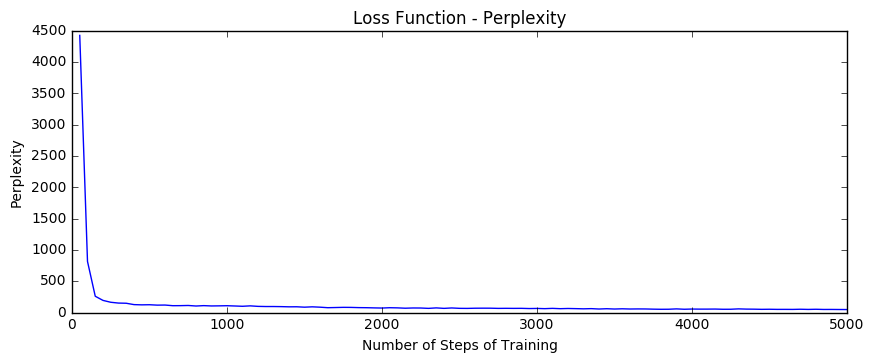

In [23]:
plt.subplot(2, 1, 1)
plt.plot(iterations,training)
plt.title('Loss Function - Perplexity')
plt.xlabel('Number of Steps of Training')
plt.ylabel('Perplexity')

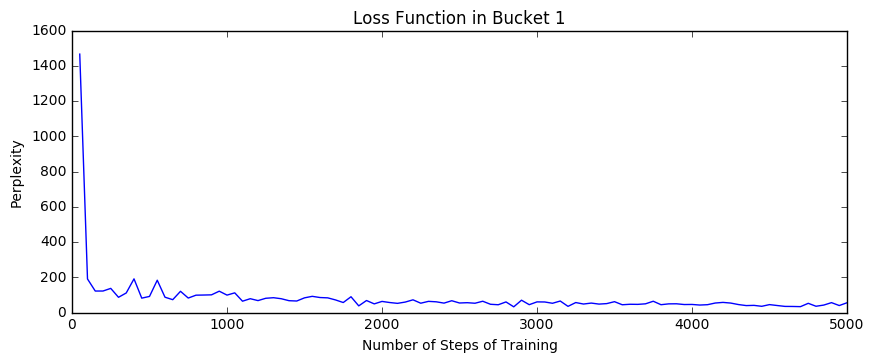

In [24]:
plt.subplot(2, 1, 1)
plt.plot(iterations,buckets[0])
plt.title('Loss Function in Bucket 1')
plt.xlabel('Number of Steps of Training')
plt.ylabel('Perplexity')

In [36]:
len(iterations)

2068

In [10]:
iteri = [i for i,x in enumerate(iterations) if x%1000==0]
#print iteri

In [11]:
bucks = []
iteri2 = []
for i in range(4):
    buck = []
    for j in iteri:
        buck.append(buckets[i][j])
    bucks.append(buck)


In [12]:
iteri2 = []
for j in iteri:
    iteri2.append(iterations[j])


In [13]:
print len(iteri2)

103


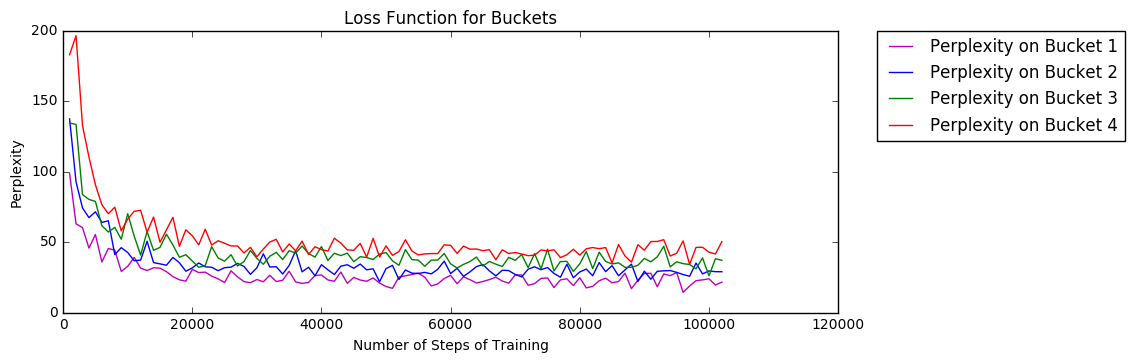

In [14]:
how_many_iter = 102
start = 0
plt.subplot(2, 1, 1)
plt.plot(iteri2[start:how_many_iter],bucks[0][start:how_many_iter],"m",label="Perplexity on Bucket 1")
plt.plot(iteri2[start:how_many_iter],bucks[1][start:how_many_iter],"b",label="Perplexity on Bucket 2")
plt.plot(iteri2[start:how_many_iter],bucks[2][start:how_many_iter],"g",label="Perplexity on Bucket 3")
plt.plot(iteri2[start:how_many_iter],bucks[3][start:how_many_iter],"r",label="Perplexity on Bucket 4")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Loss Function for Buckets')
plt.xlabel('Number of Steps of Training')
plt.ylabel('Perplexity')